In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as pyplot

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.add(layers.Dropout(0.2))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)
# We restrict the data to the first 1000 samples so as to limit execution time
# on Colab. Try to train on the entire dataset until convergence!
history = model.fit(x_train[:2500], y_train[:2500], batch_size=64, epochs=25, validation_split=0.2)

Epoch 1/25
32/32 [==============================] - 15s 308ms/step - loss: 1.4422 - accuracy: 0.5065 - val_loss: 2.0852 - val_accuracy: 0.3540
Epoch 2/25
32/32 [==============================] - 10s 312ms/step - loss: 1.1038 - accuracy: 0.6145 - val_loss: 1.9418 - val_accuracy: 0.3960
Epoch 3/25
32/32 [==============================] - 10s 309ms/step - loss: 1.0435 - accuracy: 0.6150 - val_loss: 1.8914 - val_accuracy: 0.4420
Epoch 4/25
32/32 [==============================] - 10s 312ms/step - loss: 0.9261 - accuracy: 0.6695 - val_loss: 1.8228 - val_accuracy: 0.4360
Epoch 5/25
32/32 [==============================] - 10s 300ms/step - loss: 0.7477 - accuracy: 0.7315 - val_loss: 2.2881 - val_accuracy: 0.3760
Epoch 6/25
32/32 [==============================] - 10s 303ms/step - loss: 0.7329 - accuracy: 0.7285 - val_loss: 2.3443 - val_accuracy: 0.3380
Epoch 7/25
32/32 [==============================] - 10s 316ms/step - loss: 0.6234 - accuracy: 0.7645 - val_loss: 2.4373 - val_accuracy: 0.4240

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


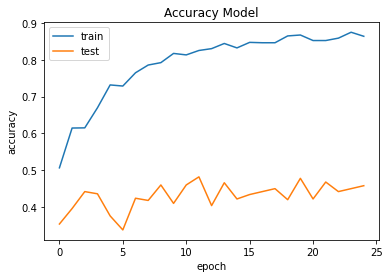

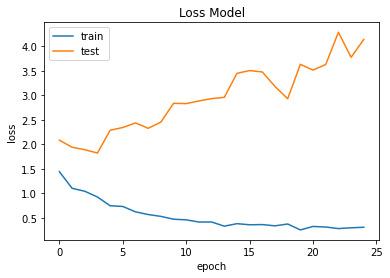

In [6]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('Accuracy Model')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()
# summarize history for loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Loss Model')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()